In [1]:
fname="/Users/mgrecu/ORO/Data/wrfout_d04_2014-06-11_00:00:00"
import netCDF4 as nc
# Open the NetCDF file
ncfile = nc.Dataset(fname)


In [7]:
dbz = ncfile['DBZ'][0,10,:,:]
print(ncfile.variables.keys())
xlong=  ncfile['XLONG'][0,:,:]
xlat=  ncfile['XLAT'][0,:,:]

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QHAIL', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'VAR', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP', 'TISO', 'TLP_STRAT', 'P_STRAT', 'MAX_MSTFX'

/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_85263/3752666045.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong[ny1:ny2,nx1:nx2],xlat[ny1:ny2,nx1:nx2],dbz[ny1:ny2,nx1:nx2], vmin=0, vmax=60, cmap='jet')


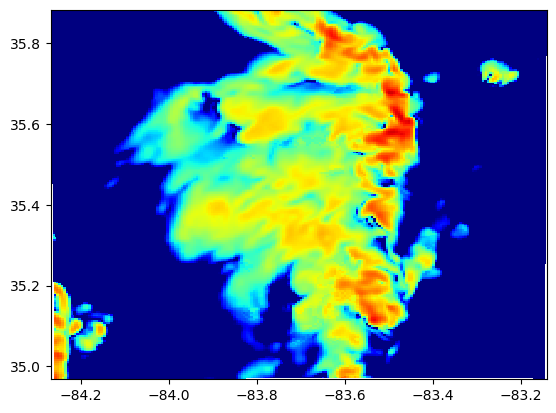

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
ny1,ny2=400,600
nx1,nx2=150,350
plt.pcolormesh(xlong[ny1:ny2,nx1:nx2],xlat[ny1:ny2,nx1:nx2],dbz[ny1:ny2,nx1:nx2], vmin=0, vmax=60, cmap='jet')

In [16]:

#print(ncfile_hyd.variables.keys())
U=ncfile.variables['U'][0,:,ny1:ny2,nx1:nx2+1]
V=ncfile.variables['V'][0,:,ny1:ny2+1,nx1:nx2]
W=ncfile.variables['W'][0,:,ny1:ny2,nx1:nx2]
T=ncfile.variables['T'][0,:,ny1:ny2,nx1:nx2]
P=ncfile.variables['P'][0,:,ny1:ny2,nx1:nx2]
PH=ncfile.variables['PH'][0,:,ny1:ny2,nx1:nx2]
PHB=ncfile.variables['PHB'][0,:,ny1:ny2,nx1:nx2]
height=(PH+PHB)/9.81e3
QVAPOR=ncfile.variables['QVAPOR'][0,:,ny1:ny2,nx1:nx2]

dbz3d=ncfile.variables['DBZ'][0,:,ny1:ny2,nx1:nx2]

In [23]:
QRAIN=ncfile.variables['QRAIN'][0,:,ny1:ny2,nx1:nx2]
QSNOW=ncfile.variables['QSNOW'][0,:,ny1:ny2,nx1:nx2]
QGRAUP=ncfile.variables['QGRAUP'][0,:,ny1:ny2,nx1:nx2]
QICE=ncfile.variables['QICE'][0,:,ny1:ny2,nx1:nx2]
QHAIL=ncfile.variables['QHAIL'][0,:,ny1:ny2,nx1:nx2]
PB=ncfile.variables['PB'][0,:,ny1:ny2,nx1:nx2]

(0.0, 50.0)

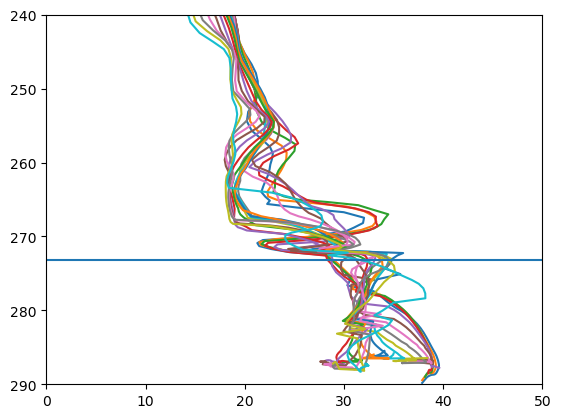

In [42]:
for i in range(100,120):
    plt.plot(dbz3d[:,110,i],Tk[:,110,i])
plt.ylim(290,240)
plt.plot([0,60],[273.15,273.15])
plt.xlim(0,50)

In [32]:
#Tk=(T+300)*(PB/100000)**(287/1004)
print(height[40:50,100,100])
dbz50=ncfile.variables['DBZ'][0,50,:,:]
a=np.nonzero(dbz50>40)
print(len(a[0]))

[3.317605495452881 3.420576572418213 3.524526834487915 3.629467010498047
 3.7354648113250732 3.842623233795166 3.9510457515716553 4.060816287994385
 4.171899795532227 4.284326076507568]
10259


(120, 200, 200)
(121, 200, 200)


/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_85263/1154122008.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(np.arange(200),height[:-1,100,:],dbz3d[:,110,:], vmin=0, vmax=60, cmap='jet')


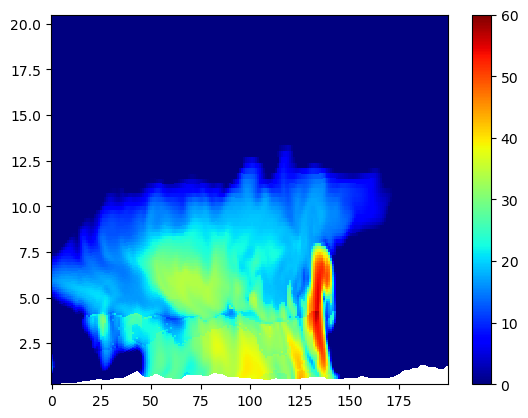

In [29]:
print(dbz3d.shape)
print(height.shape)
plt.pcolormesh(np.arange(200),height[:-1,100,:],dbz3d[:,110,:], vmin=0, vmax=60, cmap='jet')
plt.colorbar()

In [21]:
from numba import jit
import numpy as np
@jit(nopython=True)
def calculate_transport(U,V,QVAPOR,wv_transport):
    for k in range(QVAPOR.shape[1]):
        for j in range(1,QVAPOR.shape[2]-1):
            for i in range(1,QVAPOR.shape[3]-1):
                wv_transport[:,k,j,i]=U[:,k,j,i]*(QVAPOR[:,k,j,i+1]-QVAPOR[:,k,j,i-1])+V[:,k,j,i]*(QVAPOR[:,k,j+1,i]-QVAPOR[:,k,j-1,i])
    #return wv_transport
wv_transport=np.zeros((QVAPOR.shape[0],QVAPOR.shape[1],QVAPOR.shape[2],QVAPOR.shape[3]))
theta_transport=np.zeros((QVAPOR.shape[0],QVAPOR.shape[1],QVAPOR.shape[2],QVAPOR.shape[3]))
print(U.shape)
print(V.shape)   
calculate_transport(U,V,QVAPOR,wv_transport)
calculate_transport(U,V,T+300,theta_transport)

(10, 83, 204, 208)
(10, 83, 205, 207)


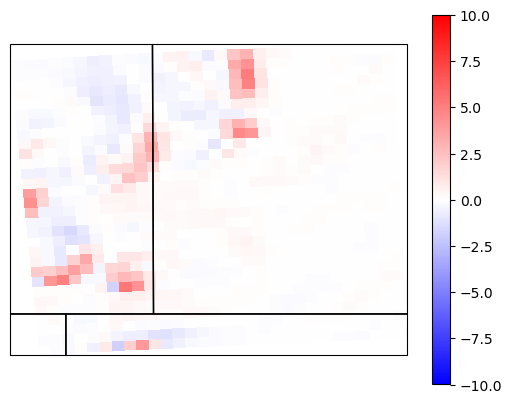

In [47]:
phbtot=PHB[0,:,:,:]+PH[0,:,:,:]
phbtot=phbtot/9.81
#plt.plot(wv_transport[0,:,ny1:ny2,nx1:nx2].sum(axis=(1,2)))
nx1s,nx2s=60,70
ny1s,ny2s=80,91
#plt.plot(wv_transport[0,:,ny1s:ny2s,nx1s:nx2s].sum(axis=(1,2)))
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.pcolormesh(lon[ny1:ny2,nx1:nx2],lat[ny1:ny2,nx1:nx2],W[0,5:30,ny1:ny2,nx1:nx2].mean(axis=0),vmin=-10,vmax=10,cmap='bwr')
#plot states
ax.add_feature(cfeature.STATES)
plt.colorbar()

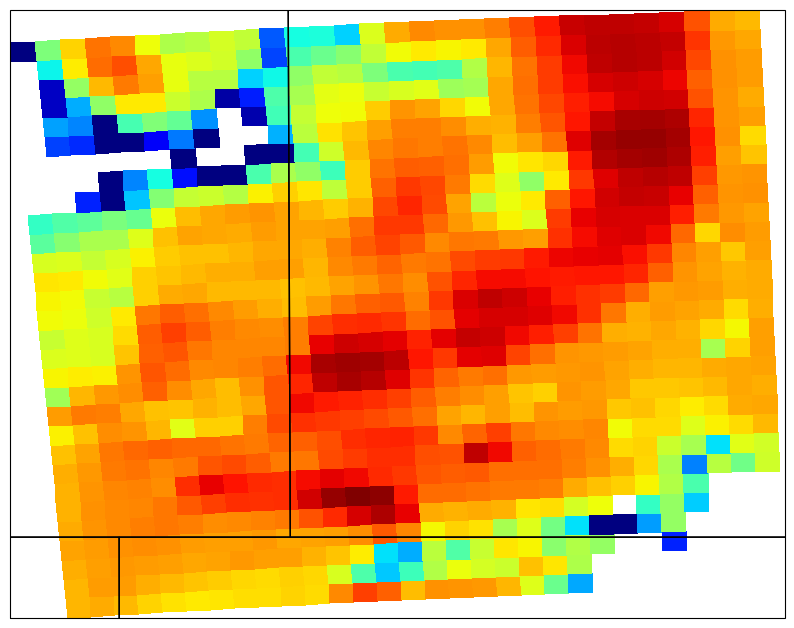

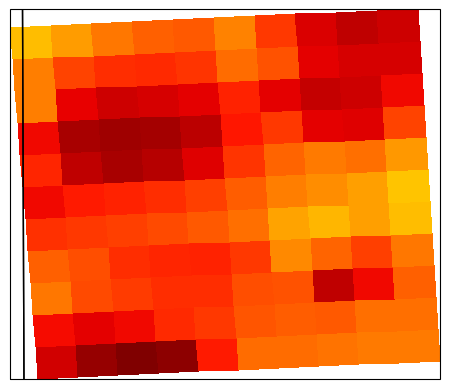

In [34]:
with nc.Dataset(fname) as ncfile:
    RAIN=ncfile.variables['RAINNC'][:]+ncfile.variables['RAINC'][:]
    lon=ncfile.variables['XLONG'][0,:,:]
    lat=ncfile.variables['XLAT'][0,:,:]
    PB=ncfile.variables['PB'][:]
    PHB=ncfile.variables['PHB'][:]
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
nx1,nx2=50,80
ny1,ny2=75,105
plt.pcolormesh(lon[ny1:ny2,nx1:nx2],lat[ny1:ny2,nx1:nx2],RAIN[-1,ny1:ny2,nx1:nx2]-RAIN[-2,ny1:ny2,nx1:nx2],transform=ccrs.PlateCarree(),cmap='jet',norm=matplotlib.colors.LogNorm(vmin=0.0001))
#plt states
ax.add_feature(cfeature.STATES)


plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
nx1s,nx2s=60,70
ny1s,ny2s=80,91
plt.pcolormesh(lon[ny1s:ny2s,nx1s:nx2s],lat[ny1s:ny2s,nx1s:nx2s],RAIN[-1,ny1s:ny2s,nx1s:nx2s]-RAIN[-2,ny1s:ny2s,nx1s:nx2s],
               transform=ccrs.PlateCarree(),cmap='jet',norm=matplotlib.colors.LogNorm(vmin=0.0001))
ax.add_feature(cfeature.STATES)

